In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Maruti_Swift_Sales_2016-2022.csv')

In [4]:
df.head()

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355


In [5]:
df.tail()

,Month,Sales
70,11-01-2021,14568
71,12-01-2021,15661
72,01-01-2022,19108
73,02-01-2022,19202
74,03-01-2022,13623


<AxesSubplot:>

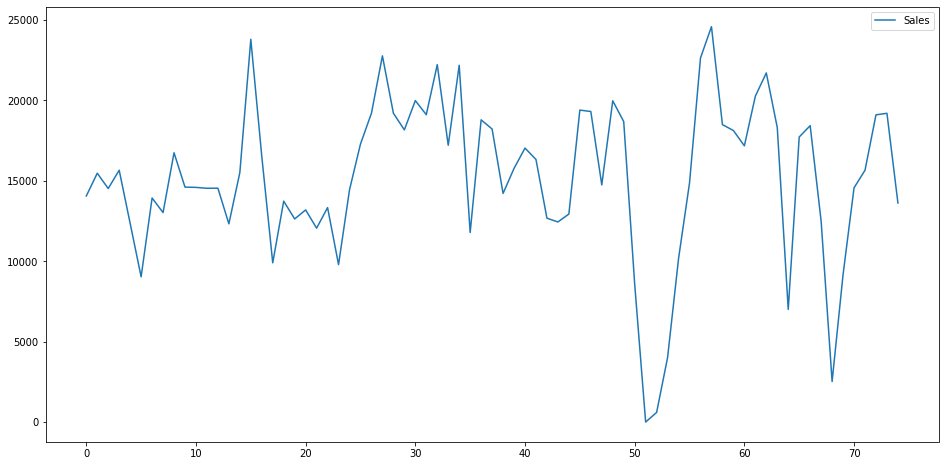

In [6]:
df.plot(figsize=(16,8))

In [8]:
df.describe()

,Sales
count,75.000000
mean,15189.320000
std,4938.414767
min,0.000000
25%,12805.500000
50%,15475.000000
75%,18592.000000
max,24589.000000


In [9]:
min_threshold = df['Sales'].quantile(0.10)
min_threshold

9425.2

In [10]:
st = df[df['Sales'] < min_threshold]
st

,Month,Sales
5,06-01-2016,9033
50,03-01-2020,8575
51,04-01-2020,0
52,05-01-2020,597
53,06-01-2020,4013
64,05-01-2021,7005
68,09-01-2021,2520
69,10-01-2021,9180


In [11]:
df.count()

Month    75
Sales    75
dtype: int64

In [12]:
df['Sales'].mean()

15189.32

In [13]:
for i in range(75):
    if df.loc[i , 'Sales'] < 9425.2:
        df.iat[i,1] = 15190

In [14]:
df.head(n = 6)

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355
5,06-01-2016,15190


In [15]:
df['Month']=pd.to_datetime(df['Month'])

In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.head(n = 6)

,Sales
Month,
2016-01-01,14057
2016-02-01,15475
2016-03-01,14524
2016-04-01,15661
2016-05-01,12355
2016-06-01,15190


<AxesSubplot:xlabel='Month'>

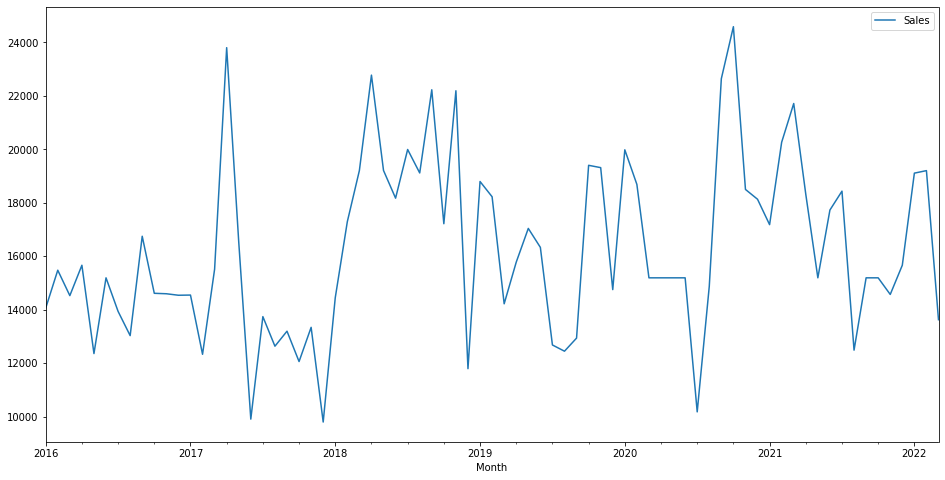

In [18]:
df.plot(figsize=(16,8))

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adfuller_test(df['Sales'])

ADF Test Statistic : -5.520051243306661
p-value : 1.886553086397335e-06
#Lags Used : 0
Number of Observations Used : 74
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Auto Regressive Model

In [21]:
df_train = df[0:63]
df_test = df[63:75]
df_test

,Sales
Month,
2021-04-01,18316
2021-05-01,15190
2021-06-01,17727
2021-07-01,18434
2021-08-01,12483
2021-09-01,15190
2021-10-01,15190
2021-11-01,14568
2021-12-01,15661


In [22]:
from pmdarima.arima import auto_arima

In [23]:
stepwise_model = auto_arima(df_train.Sales, start_p=1, start_q=1, max_p=5, max_q=3, m=7, start_P=0, seasonal=True, d=1, D=1, trace=True, suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=1071.605, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1090.824, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1083.949, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=inf, Time=0.08 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=1077.956, Time=0.19 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=1079.650, Time=0.25 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=0.62 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.11 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=1072.858, Time=0.32 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=1073.034, Time=0.46 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=1071.032, Time=0.36 sec
 ARIMA(0,1,2)(0,1,0)[7]             : AIC=1088.251, Time=0.03 s

In [24]:
print(stepwise_model.aic())

1071.0321117342257


In [25]:
model = stepwise_model.fit(df_train.Sales)

In [26]:
# ARIMA - 0,1,2 & seasonal - 7
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   63
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -531.516
Date:                             Fri, 20 May 2022   AIC                           1071.032
Time:                                     12:16:27   BIC                           1079.061
Sample:                                          0   HQIC                          1074.137
                                              - 63                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3402      0.153     -2.227      0.026      -0.640      -0.041
ma.L2         -0.2143      0.145     -1.480      0.139      -0.498       0.069
ma.S.L7       -0.8707      0.186     -4.681      0.000      -1.235      -0.506
sigma2      1.293e+07   2.62e+06      4.940      0.000     7.8e+06    1.81e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.79   Prob(JB):                         0.79
Heteroskedasticity (H):               1.06   Skew:                            -0.04
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
SARIMA_forecast = model.predict(n_periods=12)
print(SARIMA_forecast)

[21066.27245904 22692.56603557 20796.0041366  20932.67976432
 21552.55730432 20735.54162244 22684.96664472 22733.07620478
 24381.02761977 22484.4657208  22621.14134852 23241.01888852]


In [28]:
type(SARIMA_forecast)

numpy.ndarray

In [29]:
l = SARIMA_forecast.tolist()
l

[21066.272459039992,
 22692.56603557305,
 20796.004136595766,
 20932.679764319346,
 21552.557304319864,
 20735.541622436518,
 22684.966644718348,
 22733.076204784607,
 24381.027619774166,
 22484.46572079688,
 22621.141348520465,
 23241.018888520986]

In [30]:
df_test['forca'] = l
df_test

,Sales,forca
Month,,
2021-04-01,18316,21066.272459
2021-05-01,15190,22692.566036
2021-06-01,17727,20796.004137
2021-07-01,18434,20932.679764
2021-08-01,12483,21552.557304
2021-09-01,15190,20735.541622
2021-10-01,15190,22684.966645
2021-11-01,14568,22733.076205
2021-12-01,15661,24381.027620


In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [32]:
error = mean_squared_error(df.Sales[63:75],SARIMA_forecast)
error

42250316.33704139

In [33]:
df_error = sqrt(mean_squared_error(df.Sales[63:75],SARIMA_forecast))
df_error

6500.024333573021

<AxesSubplot:xlabel='Month'>

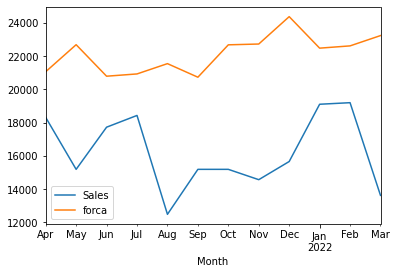

In [34]:
df_test[['Sales','forca']].plot()

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

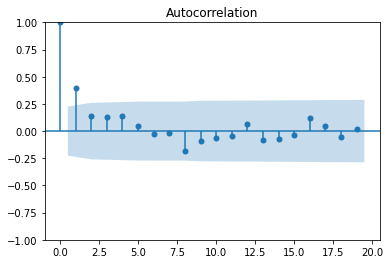

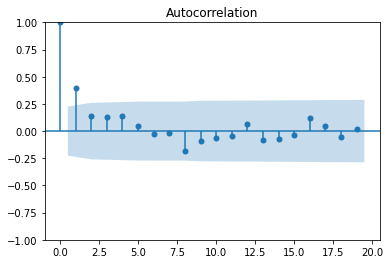

In [36]:
plot_acf(df)

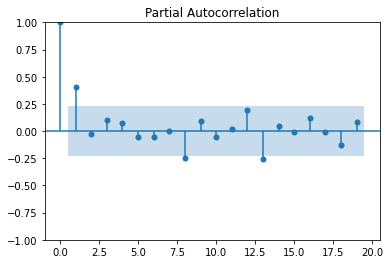

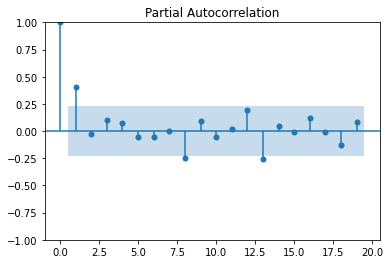

In [37]:
plot_pacf(df)

In [38]:
df_train = df[0:63]
df_test = df[63:75]
df_test

,Sales
Month,
2021-04-01,18316
2021-05-01,15190
2021-06-01,17727
2021-07-01,18434
2021-08-01,12483
2021-09-01,15190
2021-10-01,15190
2021-11-01,14568
2021-12-01,15661


In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
model=ARIMA(df_train['Sales'],order=(0,1,2))
model_fit=model.fit()

<AxesSubplot:xlabel='Month'>

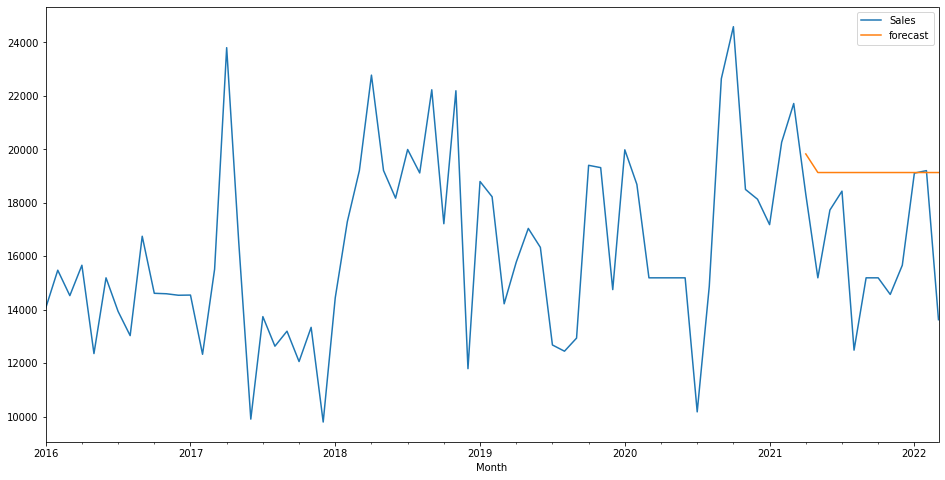

In [41]:
df['forecast']=model_fit.predict(start=63,end=74,dynamic=True)
df[['Sales','forecast']].plot(figsize=(16,8))

In [42]:
df.forecast

Month
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
                  ...     
2021-11-01    19130.791271
2021-12-01    19130.791271
2022-01-01    19130.791271
2022-02-01    19130.791271
2022-03-01    19130.791271
Name: forecast, Length: 75, dtype: float64

In [43]:
d = df.forecast.dropna()
d

Month
2021-04-01    19826.254172
2021-05-01    19130.791271
2021-06-01    19130.791271
2021-07-01    19130.791271
2021-08-01    19130.791271
2021-09-01    19130.791271
2021-10-01    19130.791271
2021-11-01    19130.791271
2021-12-01    19130.791271
2022-01-01    19130.791271
2022-02-01    19130.791271
2022-03-01    19130.791271
Name: forecast, dtype: float64

In [44]:
df.Sales[63:75]

Month
2021-04-01    18316
2021-05-01    15190
2021-06-01    17727
2021-07-01    18434
2021-08-01    12483
2021-09-01    15190
2021-10-01    15190
2021-11-01    14568
2021-12-01    15661
2022-01-01    19108
2022-02-01    19202
2022-03-01    13623
Name: Sales, dtype: int64

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [46]:
error = mean_squared_error(df.Sales[63:75],d)
error

13226626.869856007

In [47]:
df_error = sqrt(mean_squared_error(df.Sales[63:75],d))
df_error

3636.8429811934425

In [48]:
df_test = df[63:75]
df_test

,Sales,forecast
Month,,
2021-04-01,18316,19826.254172
2021-05-01,15190,19130.791271
2021-06-01,17727,19130.791271
2021-07-01,18434,19130.791271
2021-08-01,12483,19130.791271
2021-09-01,15190,19130.791271
2021-10-01,15190,19130.791271
2021-11-01,14568,19130.791271
2021-12-01,15661,19130.791271


In [49]:
import statsmodels.api as sm

In [50]:
model=sm.tsa.statespace.SARIMAX(df_train['Sales'],order=(0, 1, 2),seasonal_order=(0,1,1,12))
results=model.fit()

<AxesSubplot:xlabel='Month'>

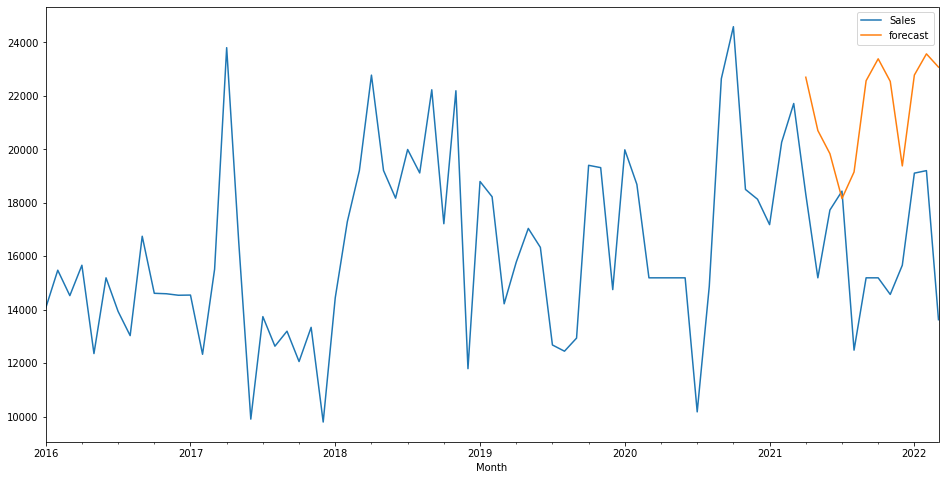

In [51]:
df['forecast']=results.predict(start=63,end=74,dynamic=True)
df[['Sales','forecast']].plot(figsize=(16,8))

In [52]:
df.forecast

Month
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
                  ...     
2021-11-01    22542.639897
2021-12-01    19378.448471
2022-01-01    22778.874182
2022-02-01    23571.603798
2022-03-01    23076.149791
Name: forecast, Length: 75, dtype: float64

In [53]:
d = df.forecast.dropna()
d

Month
2021-04-01    22697.358376
2021-05-01    20702.525614
2021-06-01    19836.099787
2021-07-01    18157.500634
2021-08-01    19150.857662
2021-09-01    22566.166509
2021-10-01    23387.320633
2021-11-01    22542.639897
2021-12-01    19378.448471
2022-01-01    22778.874182
2022-02-01    23571.603798
2022-03-01    23076.149791
Name: forecast, dtype: float64

In [54]:
df.Sales[63:75]

Month
2021-04-01    18316
2021-05-01    15190
2021-06-01    17727
2021-07-01    18434
2021-08-01    12483
2021-09-01    15190
2021-10-01    15190
2021-11-01    14568
2021-12-01    15661
2022-01-01    19108
2022-02-01    19202
2022-03-01    13623
Name: Sales, dtype: int64

In [55]:
error = mean_squared_error(df.Sales[63:75],d)
error

34959859.79945689

In [56]:
df_error = sqrt(mean_squared_error(df.Sales[63:75],d))
df_error

5912.6863437406255

In [57]:
df_test = df[63:75]
df_test

,Sales,forecast
Month,,
2021-04-01,18316,22697.358376
2021-05-01,15190,20702.525614
2021-06-01,17727,19836.099787
2021-07-01,18434,18157.500634
2021-08-01,12483,19150.857662
2021-09-01,15190,22566.166509
2021-10-01,15190,23387.320633
2021-11-01,14568,22542.639897
2021-12-01,15661,19378.448471


<AxesSubplot:xlabel='Month'>

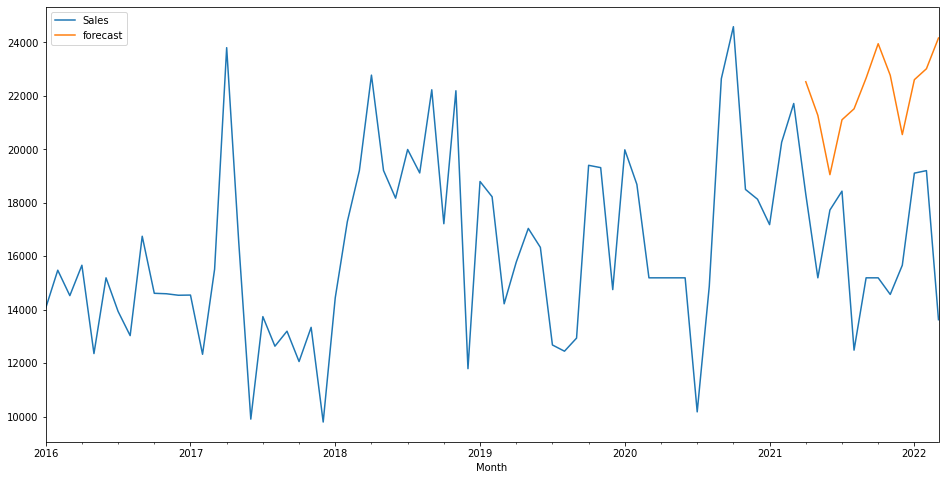

In [58]:
model=sm.tsa.statespace.SARIMAX(df_train['Sales'],order=(0, 1, 2),seasonal_order=(0,1,1,6))
results=model.fit()
df['forecast']=results.predict(start=63,end=74,dynamic=True)
df[['Sales','forecast']].plot(figsize=(16,8))

In [59]:
df.forecast

Month
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
                  ...     
2021-11-01    22770.394308
2021-12-01    20551.237307
2022-01-01    22605.247183
2022-02-01    23014.875601
2022-03-01    24166.176004
Name: forecast, Length: 75, dtype: float64

In [60]:
d = df.forecast.dropna()
d

Month
2021-04-01    22529.134318
2021-05-01    21269.944691
2021-06-01    19050.787691
2021-07-01    21104.797567
2021-08-01    21514.425985
2021-09-01    22665.726388
2021-10-01    23952.124475
2021-11-01    22770.394308
2021-12-01    20551.237307
2022-01-01    22605.247183
2022-02-01    23014.875601
2022-03-01    24166.176004
Name: forecast, dtype: float64

In [61]:
error = mean_squared_error(df.Sales[63:75],d)
error

42245898.263217844

In [62]:
df_error = sqrt(mean_squared_error(df.Sales[63:75],d))
df_error

6499.68447412779

In [63]:
df_test = df[63:75]
df_test

,Sales,forecast
Month,,
2021-04-01,18316,22529.134318
2021-05-01,15190,21269.944691
2021-06-01,17727,19050.787691
2021-07-01,18434,21104.797567
2021-08-01,12483,21514.425985
2021-09-01,15190,22665.726388
2021-10-01,15190,23952.124475
2021-11-01,14568,22770.394308
2021-12-01,15661,20551.237307


In [66]:
model=sm.tsa.statespace.SARIMAX(df_train['Sales'],order=(0, 1, 2),seasonal_order=(0,1,1,3))
results=model.fit()

<AxesSubplot:xlabel='Month'>

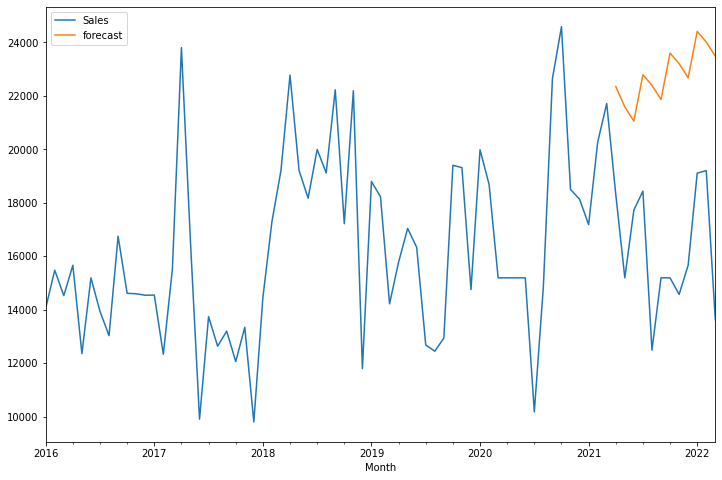

In [67]:
df['forecast']=results.predict(start=63,end=75,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [68]:
df.forecast

Month
2016-01-01             NaN
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
                  ...     
2021-11-01    23207.441229
2021-12-01    22674.520542
2022-01-01    24410.471244
2022-02-01    24017.859940
2022-03-01    23484.939253
Name: forecast, Length: 75, dtype: float64

In [69]:
d = df.forecast.dropna()
d

Month
2021-04-01    22348.120092
2021-05-01    21586.603808
2021-06-01    21053.683121
2021-07-01    22789.633823
2021-08-01    22397.022519
2021-09-01    21864.101832
2021-10-01    23600.052534
2021-11-01    23207.441229
2021-12-01    22674.520542
2022-01-01    24410.471244
2022-02-01    24017.859940
2022-03-01    23484.939253
Name: forecast, dtype: float64

In [70]:
error = mean_squared_error(df.Sales[63:75],d)
error

47764110.825572036

In [71]:
df_error = sqrt(mean_squared_error(df.Sales[63:75],d))
df_error

6911.158428626278

In [72]:
df_test = df[63:75]
df_test

,Sales,forecast
Month,,
2021-04-01,18316,22348.120092
2021-05-01,15190,21586.603808
2021-06-01,17727,21053.683121
2021-07-01,18434,22789.633823
2021-08-01,12483,22397.022519
2021-09-01,15190,21864.101832
2021-10-01,15190,23600.052534
2021-11-01,14568,23207.441229
2021-12-01,15661,22674.520542
